In [2]:
!pip install librosa

   ---------------------------------------- 0.0/1.0 MB ? eta -:--:--
   ---------------------------------------- 1.0/1.0 MB 16.1 MB/s eta 0:00:00


In [3]:
import os
import librosa
import numpy as np
from scipy.stats import kurtosis, skew
from tqdm import tqdm
import pandas as pd

import librosa
import numpy as np
from scipy.stats import skew, kurtosis


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.0.2 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "C:\Users\dell\anaconda3\Lib\site-packages\ipykernel_launcher.py", line 18, in <module>
    app.launch_new_instance()
  File "C:\Users\dell\anaconda3\Lib\site-packages\traitlets\config\application.py", line 1075, in launch_instance
    app.start()
  File "C:\Users\dell\anaconda3\Lib\site-packages\ipykernel\kernelapp.py", line 739, in start
    self.io_loop.start()
  File "C:\Users\dell\anaconda3\Lib\site-packages

ImportError: 
A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.0.2 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.



In [23]:
data.shape

(15070, 44)

In [24]:
data['label'].value_counts()

label
1    9841
0    5229
Name: count, dtype: int64

In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15070 entries, 0 to 16147
Data columns (total 44 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean_spectral_centroid   15070 non-null  float64
 1   std_spectral_centroid    15070 non-null  float64
 2   mean_spectral_bandwidth  15070 non-null  float64
 3   std_spectral_bandwidth   15070 non-null  float64
 4   mean_spectral_contrast   15070 non-null  float64
 5   mean_spectral_flatness   15070 non-null  float64
 6   mean_spectral_rolloff    15070 non-null  float64
 7   zero_crossing_rate       15070 non-null  float64
 8   rms_energy               15070 non-null  float64
 9   mean_pitch               15070 non-null  float64
 10  min_pitch                15070 non-null  float64
 11  max_pitch                15070 non-null  float64
 12  std_pitch                15070 non-null  float64
 13  spectral_skew            15070 non-null  float64
 14  spectral_kurtosis        15

C:\Users\dell\AppData\Local\Temp\ipykernel_17852\3041398148.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='label', data=data, palette='pastel')


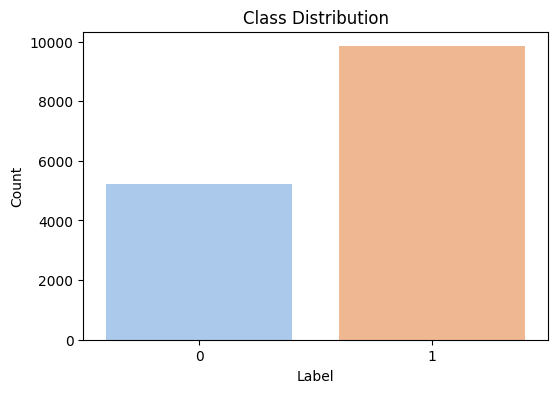

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution of the target label
plt.figure(figsize=(6, 4))
sns.countplot(x='label', data=data, palette='pastel')
plt.title('Class Distribution')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()

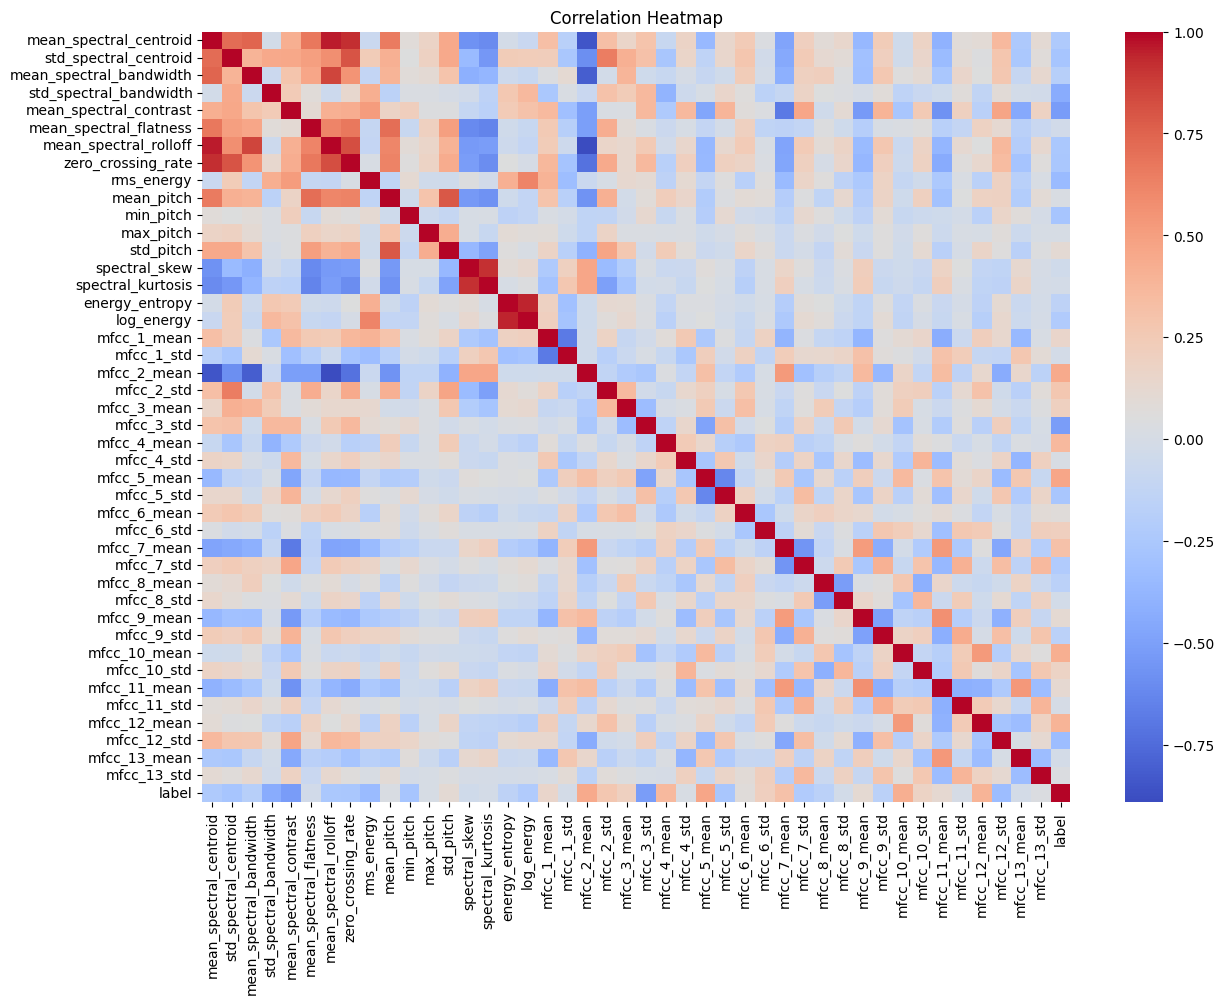


Highly Correlated Features:
                         mean_spectral_centroid  std_spectral_centroid  \
mean_spectral_centroid                 1.000000                    NaN   
std_spectral_centroid                       NaN                1.00000   
mean_spectral_bandwidth                     NaN                    NaN   
std_spectral_bandwidth                      NaN                    NaN   
mean_spectral_contrast                      NaN                    NaN   
mean_spectral_flatness                      NaN                    NaN   
mean_spectral_rolloff                  0.958263                    NaN   
zero_crossing_rate                     0.924186                0.80153   
rms_energy                                  NaN                    NaN   
mean_pitch                                  NaN                    NaN   
min_pitch                                   NaN                    NaN   
max_pitch                                   NaN                    NaN   
std_pitch

In [27]:
# Compute correlation matrix
correlation_matrix = data.corr()

# Visualize correlation matrix
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=False)
plt.title('Correlation Heatmap')
plt.show()

# Display highly correlated features
threshold = 0.8
correlated_features = correlation_matrix[correlation_matrix > threshold]
print("\nHighly Correlated Features:")
print(correlated_features)

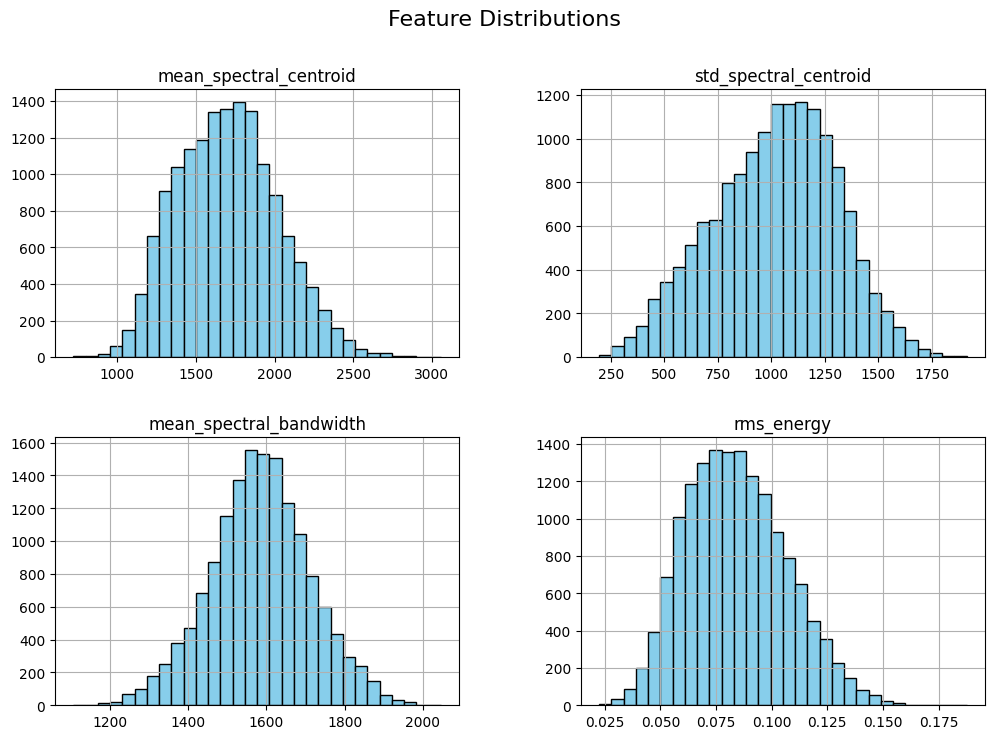

In [28]:
# Plot distributions of selected features
features_to_plot = ['mean_spectral_centroid', 'std_spectral_centroid', 'mean_spectral_bandwidth', 'rms_energy']
data[features_to_plot].hist(bins=30, figsize=(12, 8), color='skyblue', edgecolor='black')
plt.suptitle('Feature Distributions', fontsize=16)
plt.show()

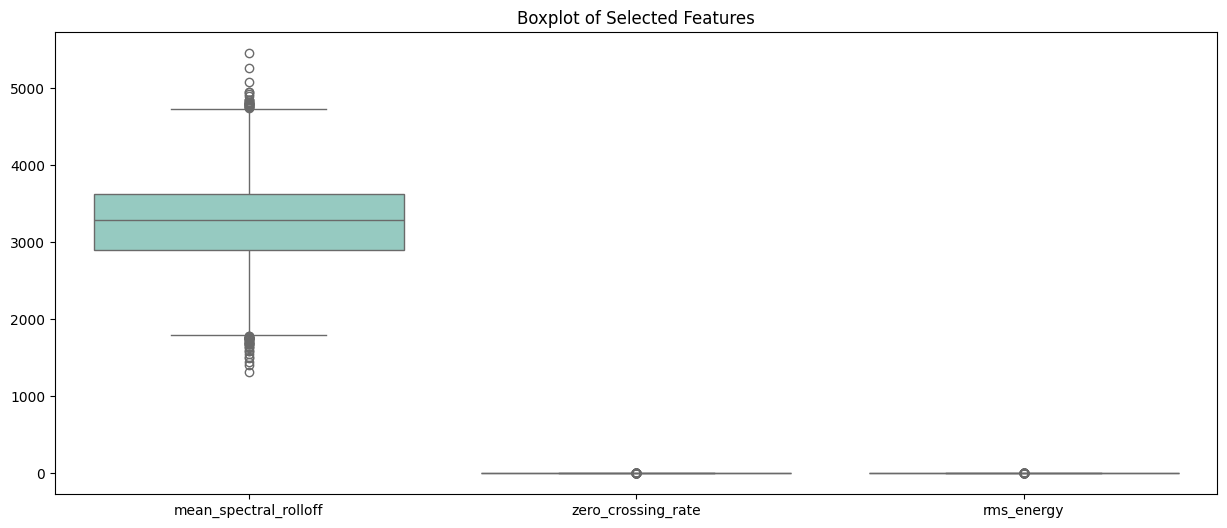

In [29]:
# Boxplots of selected features
plt.figure(figsize=(15, 6))
sns.boxplot(data=data[['mean_spectral_rolloff', 'zero_crossing_rate', 'rms_energy']], palette='Set3')
plt.title('Boxplot of Selected Features')
plt.show()

In [30]:
target_corr = correlation_matrix['label'].sort_values(ascending=False)
print("\nFeatures Most Correlated with Label:")
print(target_corr.head(10))


Features Most Correlated with Label:
label           1.000000
mfcc_5_mean     0.466618
mfcc_2_mean     0.444837
mfcc_10_mean    0.419576
mfcc_12_mean    0.393679
mfcc_4_mean     0.360128
mfcc_7_mean     0.309477
mfcc_2_std      0.273513
mfcc_6_std      0.209052
mfcc_3_mean     0.199473
Name: label, dtype: float64


In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler

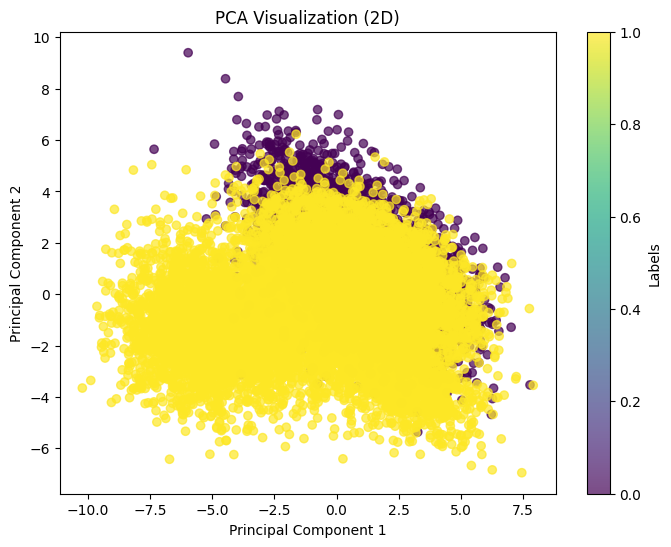

In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler

# Step 1: Separate features and labels
X = data.drop(columns=['label'])
y = data['label']

# Step 2: Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 3: PCA Visualization
def plot_pca(X, y, n_components=2):
    pca = PCA(n_components=n_components)
    X_pca = pca.fit_transform(X)
    
    plt.figure(figsize=(8, 6))
    scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', alpha=0.7)
    plt.colorbar(scatter, label='Labels')
    plt.title('PCA Visualization (2D)')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.show()

plot_pca(X_scaled, y)

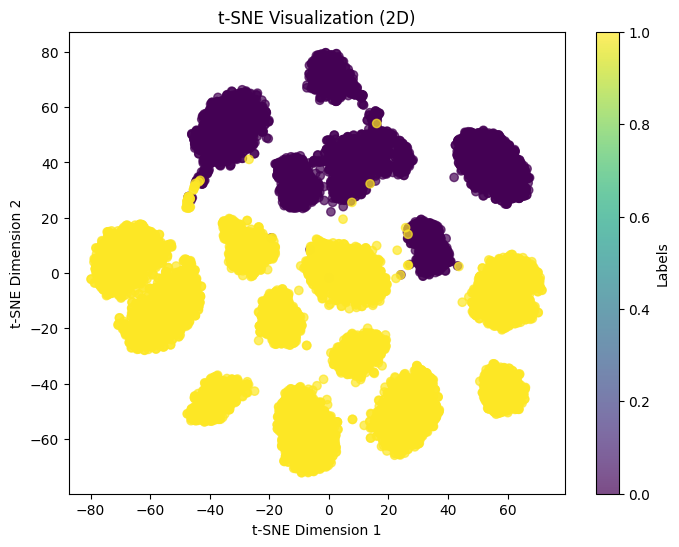

In [37]:
def plot_tsne(X, y, n_components=2, perplexity=30, random_state=42):
    tsne = TSNE(n_components=n_components, perplexity=perplexity, random_state=random_state)
    X_tsne = tsne.fit_transform(X)
    
    plt.figure(figsize=(8, 6))
    scatter = plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, cmap='viridis', alpha=0.7)
    plt.colorbar(scatter, label='Labels')
    plt.title('t-SNE Visualization (2D)')
    plt.xlabel('t-SNE Dimension 1')
    plt.ylabel('t-SNE Dimension 2')
    plt.show()

plot_tsne(X_scaled, y)

In [4]:
def extract_gender_features(audio_file):
    '''original function used to exract the csv file'''
    y, sr = librosa.load(audio_file, sr=None)
    
    # Spectral Features
    spectral_centroid = librosa.feature.spectral_centroid(y=y, sr=sr)
    spectral_bandwidth = librosa.feature.spectral_bandwidth(y=y, sr=sr)
    spectral_contrast = librosa.feature.spectral_contrast(y=y, sr=sr)
    spectral_flatness = librosa.feature.spectral_flatness(y=y)
    spectral_rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr)

    # Temporal Features
    zero_crossing_rate = librosa.feature.zero_crossing_rate(y)
    rms_energy = librosa.feature.rms(y=y)

    # Pitch Features
    pitches, magnitudes = librosa.piptrack(y=y, sr=sr)
    fundamental_freqs = pitches[pitches > 0]
    mean_pitch = np.mean(fundamental_freqs) if len(fundamental_freqs) > 0 else 0
    min_pitch = np.min(fundamental_freqs) if len(fundamental_freqs) > 0 else 0
    max_pitch = np.max(fundamental_freqs) if len(fundamental_freqs) > 0 else 0
    std_pitch = np.std(fundamental_freqs) if len(fundamental_freqs) > 0 else 0

    # MFCCs
    mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)
    mfcc_mean = np.mean(mfccs, axis=1)
    mfcc_std = np.std(mfccs, axis=1)

    # Statistical Features
    spectral_values = spectral_centroid[0]
    spectral_skew = skew(spectral_values)
    spectral_kurtosis = kurtosis(spectral_values)

    # Energy-Based Features
    energy_entropy = -np.sum(rms_energy * np.log2(rms_energy + 1e-12))
    log_energy = np.log(np.sum(rms_energy))

    features = {
        "mean_spectral_centroid": np.mean(spectral_centroid),
        "std_spectral_centroid": np.std(spectral_centroid),
        "mean_spectral_bandwidth": np.mean(spectral_bandwidth),
        "std_spectral_bandwidth": np.std(spectral_bandwidth),
        "mean_spectral_contrast": np.mean(spectral_contrast),
        "mean_spectral_flatness": np.mean(spectral_flatness),
        "mean_spectral_rolloff": np.mean(spectral_rolloff),
        "zero_crossing_rate": np.mean(zero_crossing_rate),
        "rms_energy": np.mean(rms_energy),
        "mean_pitch": mean_pitch,
        "min_pitch": min_pitch,
        "max_pitch": max_pitch,
        "std_pitch": std_pitch,
        "spectral_skew": spectral_skew,
        "spectral_kurtosis": spectral_kurtosis,
        "energy_entropy": energy_entropy,
        "log_energy": log_energy,
    }

    for i, (mfcc_m, mfcc_s) in enumerate(zip(mfcc_mean, mfcc_std), start=1):
        features[f"mfcc_{i}_mean"] = mfcc_m
        features[f"mfcc_{i}_std"] = mfcc_s

    return features

In [5]:
def process_audio_folder(data_folder):
    features = []
    labels = []

    for label, folder in enumerate(['female', 'male']):
        folder_path = os.path.join(data_folder, folder)
        if not os.path.exists(folder_path):
            print(f"Folder {folder_path} does not exist.")
            continue

        for file in tqdm(os.listdir(folder_path), desc=f"Processing {folder} files"):
            file_path = os.path.join(folder_path, file)
            if file_path.endswith('.ogg'):
                try:
                    file_features = extract_gender_features(file_path)
                    features.append(file_features)
                    labels.append(label)
                except Exception as e:
                    print(f"Error processing {file_path}: {e}")

    # Combine features and labels into a DataFrame
    df = pd.DataFrame(features, columns=[
        "mean_spectral_centroid", "std_spectral_centroid", "mean_spectral_bandwidth", 
        "std_spectral_bandwidth", "mean_spectral_contrast", "mean_spectral_flatness", 
        "mean_spectral_rolloff", "zero_crossing_rate", "rms_energy", "mean_pitch", 
        "min_pitch", "max_pitch", "std_pitch", "spectral_skew", "spectral_kurtosis", 
        "energy_entropy", "log_energy", "mfcc_1_mean", "mfcc_1_std", "mfcc_2_mean", 
        "mfcc_2_std", "mfcc_3_mean", "mfcc_3_std", "mfcc_4_mean", "mfcc_4_std", 
        "mfcc_5_mean", "mfcc_5_std", "mfcc_6_mean", "mfcc_6_std", "mfcc_7_mean", 
        "mfcc_7_std", "mfcc_8_mean", "mfcc_8_std", "mfcc_9_mean", "mfcc_9_std", 
        "mfcc_10_mean", "mfcc_10_std", "mfcc_11_mean", "mfcc_11_std", "mfcc_12_mean", 
        "mfcc_12_std", "mfcc_13_mean", "mfcc_13_std"
    ])
    df['label'] = labels

    return df

In [7]:
data = pd.read_csv(r'C:\Users\dell\Desktop\MyDocs\Docs\MK\vocal_gender_features_new.csv')
data = data.drop_duplicates() #there is still some duplicated data
x = data.drop(['label'], axis=1)

#we will use only this features to avoid overfitting
x = x[["mean_spectral_centroid",
    "mean_spectral_bandwidth",
    "mean_spectral_flatness",
    "zero_crossing_rate",
    "mean_pitch",
    "std_pitch",
    "mfcc_1_mean",
    "mfcc_2_mean",
    "mfcc_3_mean",]]

y = data['label']

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=907)

# Scale the data
scaler = MinMaxScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

y_train = y_train.astype(int)
y_test = y_test.astype(int)

In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier, ExtraTreesClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.metrics import accuracy_score

In [10]:
models = [
    ('LogisticRegression', LogisticRegression()),
    ('DecisionTreeClassifier', DecisionTreeClassifier()),
    ('RandomForestClassifier', RandomForestClassifier()),
    ('GradientBoostingClassifier', GradientBoostingClassifier()),
    ('SVC', SVC()),
    ('KNeighborsClassifier', KNeighborsClassifier()),
    ('GaussianNB', GaussianNB()),
    ('BernoulliNB', BernoulliNB()),
    ('MultinomialNB', MultinomialNB()),
    ('LinearDiscriminantAnalysis', LinearDiscriminantAnalysis()),
    ('QuadraticDiscriminantAnalysis', QuadraticDiscriminantAnalysis()),
    ('AdaBoostClassifier', AdaBoostClassifier()),
    ('BaggingClassifier', BaggingClassifier()),
    ('ExtraTreesClassifier', ExtraTreesClassifier())
]

In [11]:
results = []

for name, model in models:
    try:
        # Fit the model
        model.fit(x_train_scaled, y_train)
        # Predict on test data
        y_pred = model.predict(x_test_scaled)
        # Calculate accuracy
        accuracy = accuracy_score(y_test, y_pred)
        # Append results
        results.append((name, accuracy))
    except Exception as e:
        print(f"Error with {name}: {e}")

# Sort the results by accuracy in descending order
results_sorted = sorted(results, key=lambda x: x[1], reverse=True)

# Print the results
print("Model Accuracies (Highest First):")
for name, acc in results_sorted:
    print(f"{name}: {acc:.4f}")

Model Accuracies (Highest First):
SVC: 0.9453
QuadraticDiscriminantAnalysis: 0.9323
ExtraTreesClassifier: 0.9313
RandomForestClassifier: 0.9204
KNeighborsClassifier: 0.9190
GradientBoostingClassifier: 0.9157
BaggingClassifier: 0.9141
LinearDiscriminantAnalysis: 0.9035
LogisticRegression: 0.8908
DecisionTreeClassifier: 0.8792
AdaBoostClassifier: 0.8626
GaussianNB: 0.7326
BernoulliNB: 0.6619
MultinomialNB: 0.6612


In [12]:
from skopt import BayesSearchCV
from sklearn.ensemble import ExtraTreesClassifier


param_space = {
    'n_estimators': (50, 500),  # Number of trees in the forest (integer range)
    'max_features': (0.1, 1.0, 'log-uniform'),  # Number of features to consider at each split
    'max_depth': (5, 50),  # Maximum depth of the tree (integer range)
    'min_samples_split': (2, 20),  # Minimum number of samples required to split an internal node (integer range)
    'min_samples_leaf': (1, 20),  # Minimum number of samples required to be at a leaf node (integer range)
    'bootstrap': [True, False],  # Whether bootstrap samples are used when building trees
    'criterion': ['gini', 'entropy']  # Function to measure the quality of a split
}

# Create an ExtraTreesClassifier
extra_trees = ExtraTreesClassifier(random_state=907)

# Set up BayesSearchCV
bayes_search = BayesSearchCV(
    estimator=extra_trees,
    search_spaces=param_space,
    scoring='accuracy',
    cv=5,
    n_iter=100,  # Number of parameter settings sampled
    n_jobs=-1,
    verbose=0,
    random_state=907
)

In [13]:
params = {
    'bootstrap': False,
    'criterion': 'entropy',
    'max_depth': 35,
    'max_features': 0.7036658016296257,
    'min_samples_leaf': 1,
    'min_samples_split': 3,
    'n_estimators': 500
}


extra_tree_model = ExtraTreesClassifier(**params, random_state=907)

extra_tree_model.fit(x_train_scaled, y_train)
       
y_pred = extra_tree_model.predict(x_test_scaled)
        
accuracy = accuracy_score(y_test, y_pred)

In [14]:
import joblib
joblib.dump(scaler, 'scaler.pkl')
joblib.dump(extra_tree_model, 'ETC_model.pkl')

['ETC_model.pkl']

In [15]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
tf.random.set_seed(907)

In [16]:
model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(9,)))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.summary()

C:\Users\dell\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │         1,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,649 (45.50 KB)

 Trainable params: 11,649 (45.50 KB)

 Non-trainable params: 0 (0.00 B)

In [17]:
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

In [18]:
checkpoint = ModelCheckpoint('NN_model.keras', monitor='val_loss', save_best_only=True, mode='min')
early_stop = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.4, patience=8)

callbacks = [checkpoint, early_stop, reduce_lr]

In [19]:
from sklearn.utils.class_weight import compute_class_weight

y_train = np.array(y_train)

class_weights = compute_class_weight(
    class_weight='balanced', 
    classes=np.unique(y_train), 
    y=y_train  
)

class_weights_dict = dict(enumerate(class_weights))
class_weights_dict

{0: np.float64(1.432509505703422), 1: np.float64(0.7680937818552498)}

In [20]:
history = model.fit(
    x_train_scaled, y_train,
    epochs=1000,
    batch_size=128,
    validation_split=0.2,
    callbacks=callbacks,
    class_weight = class_weights_dict
)

AttributeError: module 'ml_dtypes' has no attribute 'float8_e3m4'
Epoch 1/1000
76/76 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.5852 - loss: 0.6625 - val_accuracy: 0.7264 - val_loss: 0.5373 - learning_rate: 0.0010
Epoch 2/1000
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7150 - loss: 0.5508 - val_accuracy: 0.7649 - val_loss: 0.4777 - learning_rate: 0.0010
Epoch 3/1000
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7675 - loss: 0.4641 - val_accuracy: 0.7645 - val_loss: 0.4648 - learning_rate: 0.0010
Epoch 4/1000
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8320 - loss: 0.3780 - val_accuracy: 0.8818 - val_loss: 0.3114 - learning_rate: 0.0010
Epoch 5/1000
76/76 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8862 - loss: 0.3009 - val_accuracy: 0.8926 - val_loss: 0.2841 - learning_rate: 0.0010
Epoch 6/1000
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8974 - loss: 0.2651 - val_accuracy: 0.9142 - val_loss: 0.2382 - learning_rate: 0.0010
Epoch 7/1000
76/76 ━━━

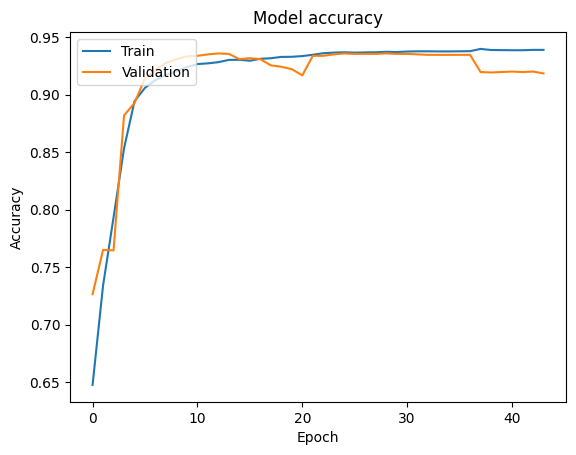

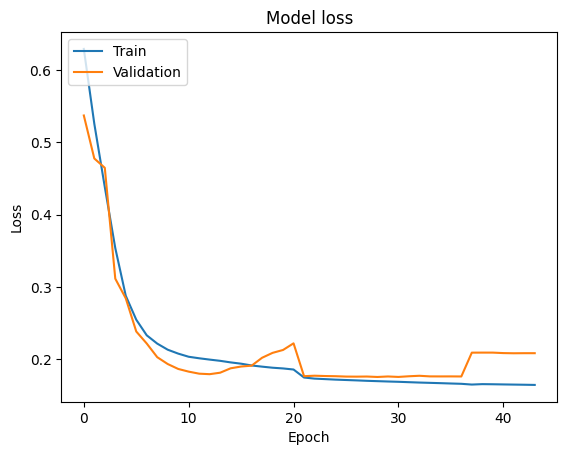

In [21]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()